Laboratorio 2 SIS420

Regresión Logística con Clasificación Binaria
El objetivo de esta regresiónn es predecir una de dos categorías posibles.
Haremos uso de la regresion logistica para predecir si una persona sufrira una muerte por ataque al corazon usando sus datos medicos para la predicción

Usaremos el dataset Hear_Disease_Healt que cumple con los campos solicitados

11 propiedades (n>10) y por lo menos 20000 ejemplos (m>=20000)

Comenzamos importando drive para hacer uso del dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importaremos la libreria panda en la que usaremos el dataset para revisar si el dataset es funcional para la regresión

In [210]:
import pandas as pd
import sklearn as skl

url = "/content/drive/MyDrive/SIS420/Lab2/heart_disease_health_indicators.csv"
dataframe = pd.read_csv(url)
print(dataframe)

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
0                          0       1         1          1   40       1   
1                          0       0         0          0   25       1   
2                          0       1         1          1   28       0   
3                          0       1         0          1   27       0   
4                          0       1         1          1   24       0   
...                      ...     ...       ...        ...  ...     ...   
253656                     0       0         0          1   25       0   
253657                     0       0         1          1   24       0   
253658                     0       0         0          0   27       0   
253659                     0       0         1          1   37       0   
253660                     0       0         1          1   34       1   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0            0         0             0   

In [211]:
print(dataframe.describe())

       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253661.000000  253661.000000  253661.000000  253661.000000   
mean               0.094173       0.428990       0.424113       0.962667   
std                0.292070       0.494933       0.494209       0.189578   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253661.000000  253661.000000  253661.000000  253661.000000   
mean       28.382475       0.443186       0.040570       0.296904   
std         6.608638       0.496763       0.197292       0.698147   
min        12.000000       0.000000    

En el caso de mi dataset no se encontró ningun valor nulo y no hay datos tipo string que debamos modificar, por lo que el dataset ya esta listo para usar

**Importo las librerias necesarias**


In [212]:
import os
import random
import numpy as np
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Cargo el dataset separandolo en 2 partes

80% Para el entrenamiento

20% Para el test

In [230]:
data = np.loadtxt('/content/drive/MyDrive/SIS420/Lab2/heart_disease_health_indicators(modificado).csv', delimiter=',')
X_train, y_train = data[:202930 , 0:21], data[:202930 , 21]
X_test, y_test = data[50731:, 0:21], data[50731:, 21]
X = X_train
y = y_train
print(X)
print(y)

[[ 1.  1.  1. ...  9.  4.  3.]
 [ 0.  0.  0. ...  7.  6.  1.]
 [ 1.  1.  1. ...  9.  4.  8.]
 ...
 [ 1.  1.  1. ... 13.  3.  5.]
 [ 0.  0.  1. ...  3.  6.  8.]
 [ 1.  1.  1. ... 10.  6.  7.]]
[0. 0. 0. ... 1. 0. 0.]


**FUNCION SIGMOIDEA**


La función sigmoide transforma números reales en un rango de 0 a 1, usada para modelar probabilidades en clasificación binaria.

In [231]:
def sigmoid(z):
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [232]:
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [233]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=50)
# Normalizar características solo en los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Funcion de Costo y Gradiente**

In [234]:

m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)


In [235]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [236]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Calculamos el descenso por el gradiente

theta calculado por el descenso por el gradiente: [-3.52908061e-03  1.86134870e-03  1.29845845e-03 -3.13230677e-03
 -6.87408968e-02  3.94419121e-05  1.00862974e-03  3.09114269e-03
 -3.86253536e-03 -2.62923150e-03 -3.32237821e-03 -4.12670824e-04
 -3.22499118e-03 -6.87815160e-05 -5.25081035e-04  1.29013560e-03
  2.53690884e-02  1.76697895e-03 -9.81375399e-05 -8.35203752e-03
 -2.06507750e-02 -2.92175615e-02]


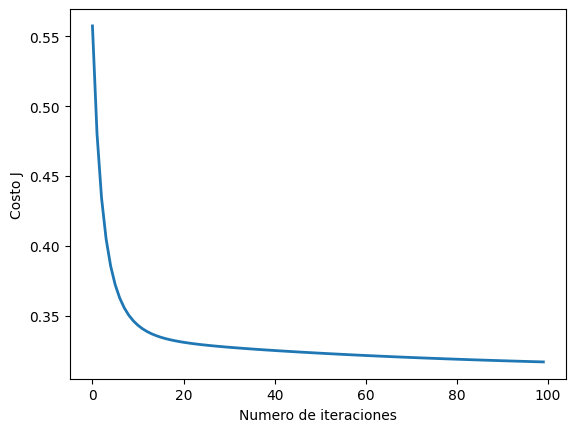

In [237]:
alpha = 0.001
num_iters = 100

theta = np.zeros(22)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [238]:
def costFunction(theta, X, y):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h )))
    grad = (1 / m) * (h - y).dot(X)
    return J, grad

In [246]:
initial_theta = np.zeros(n+1)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[4.05391022e-01 1.44054600e-01 1.46148918e-01 3.88062386e-01
 1.14121027e+01 1.65931602e-01 4.79475681e-03 8.31271867e-02
 3.17597201e-01 2.60789435e-01 3.32247573e-01 2.46267186e-02
 3.84891342e-01 3.10353324e-02 9.34292613e-01 1.15432169e+00
 1.24924851e+00 4.50303060e-02 1.65337801e-01 3.07388508e+00
 2.07876361e+00 2.54992362e+00]
Gradiente en theta inicial (zeros):
	[0.4054, 0.1441, 0.1461]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



Calculamos la precision del entrenamiento

In [247]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p


In [248]:
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))

Precisión de entrenamiento: 90.54 %


Concatenamos una fila de unos al X_test

In [242]:
m, n = X_test.shape
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

Calculamos la precision del test

In [249]:
p = predict(theta, X_test)
y_test = y_test[:40586]
print('Precisión del test: {:.2f} %'.format(np.mean(p == y_test) * 100))

Precisión del test: 90.07 %


Hacemos las 100 predicciones solicitadas

In [260]:
for i in range(1,101):
  prob = sigmoid(np.dot([random.uniform(0,1) for _ in range(22)], theta))
  print(i,'Predicciones de muerte por ataque al corazon: {:.3f}%'.format(prob))


1 Predicciones de muerte por ataque al corazon: 0.491%
2 Predicciones de muerte por ataque al corazon: 0.491%
3 Predicciones de muerte por ataque al corazon: 0.494%
4 Predicciones de muerte por ataque al corazon: 0.478%
5 Predicciones de muerte por ataque al corazon: 0.496%
6 Predicciones de muerte por ataque al corazon: 0.483%
7 Predicciones de muerte por ataque al corazon: 0.483%
8 Predicciones de muerte por ataque al corazon: 0.489%
9 Predicciones de muerte por ataque al corazon: 0.492%
10 Predicciones de muerte por ataque al corazon: 0.476%
11 Predicciones de muerte por ataque al corazon: 0.497%
12 Predicciones de muerte por ataque al corazon: 0.487%
13 Predicciones de muerte por ataque al corazon: 0.470%
14 Predicciones de muerte por ataque al corazon: 0.488%
15 Predicciones de muerte por ataque al corazon: 0.481%
16 Predicciones de muerte por ataque al corazon: 0.482%
17 Predicciones de muerte por ataque al corazon: 0.497%
18 Predicciones de muerte por ataque al corazon: 0.482%
1